# Plots for muscle-invasive and non-muscle-invasive BLCA


In [10]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [11]:
import sys
sys.path.append('../../')
from consensus_variables import *

In [12]:
plots_dir = 'plot'
data_dir = 'data/tumors_data'

In [13]:
colors_dict = {"NORMAL" : "#FD8D3D",
               "NMIBC" : "#64b5a5",
               "MIBC" : "#64b5a5"}

In [14]:
def plot_mut_rate(df, 
                  colors_dict,
                  figsize=(8, 4.7),
                  bar_width=0.7, 
                  shift=0.07, 
                  hspace=0.1,
                  title=None, 
                  save=False, 
                  add_txt=False,
                  filename='proportion.png'):
    
    df = df.copy()
    mibc_df = df[df["TISSUE"] == "MIBC"].drop(columns=["TISSUE"])
    nmibc_df = df[df["TISSUE"] == "NMIBC"].drop(columns=["TISSUE"])
    normal_df = df[df["TISSUE"] == "NORMAL"].drop(columns=["TISSUE"])
    
    # titles = ["Muscle-invasive bladder cancer (MIBC)",
    #           "Non-muscle-invasive bladder cancer (NMIBC)",
    #           "Normal bladder urothelium"]
    
    titles = ["Muscle-invasive bladder cancer (MIBC)\n(N=622; Source: cBioPortal)",
              "Non-muscle-invasive bladder cancer (NMIBC)\n(N=184; Source: cBioPortal, Hurst et al.)",
              "Normal bladder urothelium"]
    
    # Create the plot
    fig, axes = plt.subplots(3, 1, 
                             figsize=figsize, 
                             sharex=True, 
                             gridspec_kw={'hspace': hspace, 
                                          'height_ratios': [0.5, 0.5, 0.5]})

    for i, tissue in enumerate(["MIBC", "NMIBC", "NORMAL"]):
        tissue_df = df[df["TISSUE"] == tissue].drop(columns=["TISSUE"])
        
        bar_plot = tissue_df.plot(kind='bar', ax=axes[i],
                                  width=bar_width, color=colors_dict[tissue],
                                  edgecolor="white", lw=1)

        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].set_ylabel("Muts / Mb", fontsize=plots_general_config["annots_fontsize"])
        axes[i].legend().remove()
        axes[i].text(0.5, 1.15, titles[i], ha='center', va='top', transform=axes[i].transAxes,
                        fontsize=plots_general_config["annots_fontsize"])

        # axes[i].yaxis.set_major_locator(MaxNLocator(integer=True, nbins=3))
        
        if add_txt:
            for n, p in enumerate(bar_plot.patches):
                x = p.get_x() + p.get_width() / 2  
                y = p.get_height() 
                axes[i].text(x, y, np.round(tissue_df.MUTRATE_MB[n], 1), 
                                ha='center', va='bottom', fontsize=plots_general_config["annots_fontsize"])

    # axes[0].set_ylim(0, 350)

    genes = normal_df.index
    axes[i].set_xticklabels(genes, rotation=45)
    axes[i].set_xlim(-0.55, len(genes) - 0.5)
    axes[i].set_xlabel(None)

    plt.tight_layout()
    if save:
        fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [15]:
# Protein affecting mutrate REGIONS for Normal Bladder

col_rename = {"gene" : "GENE", "numb_muts" : "N_MUTS", "mutrate_MbGenome" : "MUTRATE_MB"}

# mutrate_mibc = pd.read_table("/data/bbg/projects/bladder_ts/results/tumors/mibc_cbioportal_mutrate_bladder_genes.tsv")
# mutrate_nmibc = pd.read_table("/data/bbg/projects/bladder_ts/results/tumors/nmibc_msk_hurst_mutrate_bladder_genes.tsv")

mutrate_mibc = pd.read_table(f"{data_dir}/mibc_cbioportal_mutrate_bladder_genes.tsv")
mutrate_nmibc = pd.read_table(f"{data_dir}/nmibc_msk_hurst_mutrate_bladder_genes.tsv")
mutrate_mibc = mutrate_mibc.rename(columns=col_rename)[["GENE", "N_MUTS", "MUTRATE_MB"]]
mutrate_nmibc = mutrate_nmibc.rename(columns=col_rename)[["GENE", "N_MUTS", "MUTRATE_MB"]]

mutrate_normal = pd.read_table(f"{deepcsa_run_dir}/mutrate/all_mutrates.tsv")

# select all mutations that are protein affecting
mutrate_normal = mutrate_normal[(mutrate_normal["SAMPLE_ID"] == "all_samples") & 
                                  (mutrate_normal["MUTTYPES"] == "all_types") &
                                  (mutrate_normal["REGIONS"] == "protein_affecting")]

mutrate_normal = mutrate_normal[mutrate_normal["GENE"].isin(gene_list_fig5)
                               ][["GENE", "N_MUTS", "MUTRATE_MB_ADJUSTED"]]

mutrate_normal = mutrate_normal.sort_values("MUTRATE_MB_ADJUSTED",
                                            ascending=False).set_index("GENE").rename(columns={"MUTRATE_MB_ADJUSTED" : "MUTRATE_MB"})
mutrate_mibc = mutrate_mibc.set_index("GENE").reindex(mutrate_normal.index)
mutrate_nmibc = mutrate_nmibc.set_index("GENE").reindex(mutrate_normal.index)

mutrate_mibc["TISSUE"] = "MIBC"
mutrate_nmibc["TISSUE"] = "NMIBC"
mutrate_normal["TISSUE"] = "NORMAL"
mutrate_df = pd.concat((mutrate_mibc, mutrate_nmibc, mutrate_normal))[["MUTRATE_MB", "TISSUE"]]
mutrate_df

,MUTRATE_MB,TISSUE
GENE,,
CDKN1A,107.744108,MIBC
FOXQ1,13.409563,MIBC
RBM10,14.633704,MIBC
KDM6A,54.598733,MIBC
KMT2D,10.382810,MIBC
STAG2,30.923735,MIBC
ARID1A,22.601341,MIBC
TP53,250.987028,MIBC
EP300,11.502185,MIBC


/tmp/ipykernel_1571732/3626388718.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


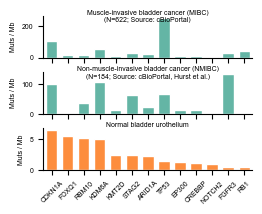

In [16]:
plot_mut_rate(mutrate_df,
              colors_dict,
              figsize=(2.7, 2),
              hspace=0.35,
              save=True, 
              filename=f"{plots_dir}/Extended9A_mut_rate.pdf"
             )